# K Mean  Using Numpy

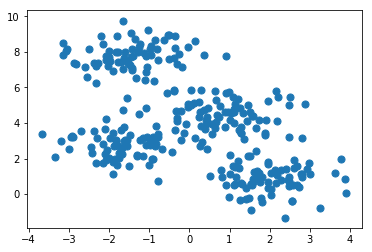

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np

# online example to generate random sample
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.80, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

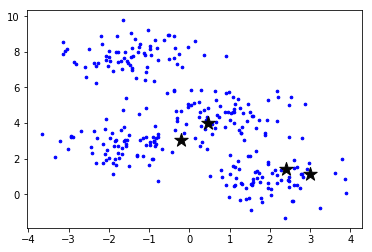

In [3]:
#initilization
k = 4
n_samples = 300
n_feature = 2
rand_idx = np.arange(n_samples)
np.random.shuffle(rand_idx)
cluster = X[rand_idx[:k], :]
cluster_old = X[rand_idx[:k], :]
distances = np.zeros((n_samples, k), dtype=np.float32)

error = 100

threshold = 0.01

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], s=7, c="b")
ax.scatter(cluster[:, 0], cluster[:, 1], marker="*", s=200, c="#050505")
plt.show()

In [4]:
#update k cluster
while error >= threshold:
    # compute distance for different clusters
    for i in range(k):
        distances[:, i] = np.sum(np.multiply(X - cluster_old[i,:], X - cluster_old[i,:]), axis = 1)

    # compute belonging of every points
    belong = np.argmin(distances, axis = 1)

    # get new cluster
    for i in range(k):
        cluster[i, :] = np.mean(X[belong == i, :], axis = 0)

    # compute difference between old cluster and new cluster
    error = np.sum(np.sqrt(np.sum(np.multiply(cluster_old - cluster, cluster_old - cluster), axis = 1)))
    error = np.asscalar(error)
    print("error = ", error)
    cluster_old[:, :] = cluster[:, :]

error =  5.007045485656949
error =  0.9724899596662329
error =  1.2008767003127025
error =  1.3935713008790716
error =  1.953563409098272
error =  1.6323755897024819
error =  0.5557666595804345
error =  0.21327406787979677
error =  0.03966495752006413
error =  0.0


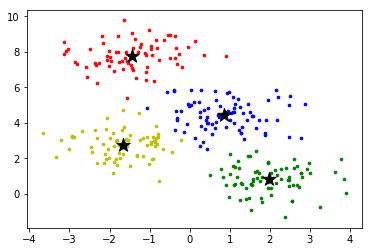

In [5]:
fig, ax = plt.subplots()
colors = ["r", "g", "b", "y", "c", "m"]
for i in range(k):
    points = X[belong == i, :]
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(cluster[:, 0], cluster[:, 1], marker="*", s=200, c="#050505")
plt.show()